In [1]:
import numpy as np
import matplotlib.pyplot as plt

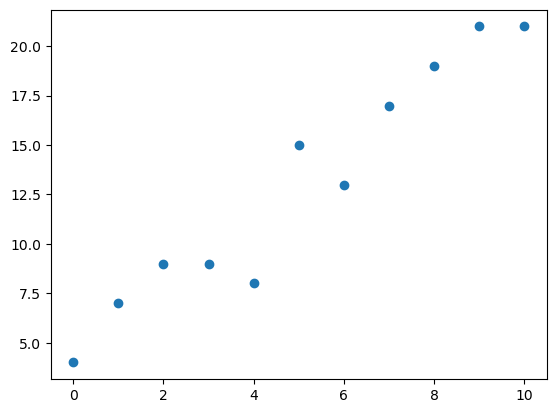

In [2]:
# Random Data Generator
M = 11
features = np.linspace(0, 10, M)
offset_generator = np.random.randint(-3,3, size=(1,M))
label_generator = lambda x: x * 2 + 3
labels = label_generator(features) + offset_generator
plt.scatter(features, labels)

In [3]:
# Printing the data
print(features)
print(labels)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[[ 4.  7.  9.  9.  8. 15. 13. 17. 19. 21. 21.]]


In [4]:
# Feature and Label Scaling
min_feature = np.min(features)
max_feature = np.max(features)
min_label = np.min(labels)
max_label = np.max(labels)
def scale_feature(features):
    features /= max_feature

def scale_labels(labels):
    labels /= max_label

scale_feature(features)
scale_labels(labels)

In [5]:
learning_rate = 0.1
# w = np.array([0.1, 0.1])
w = 0.1
b = 0.1
margin_error = 0.02
converged = False

def hypothesis(w, b, x):
    return w * x + b

def cost_function(w,b):
    return (np.sum(( hypothesis(w,b,features) - labels ) ** 2))/ (2 * M)

def cost_slope_bias(w,b):
    return (np.sum(hypothesis(w,b,features) - labels)) / M

def cost_slope_weight(w,b):
    return (np.sum(hypothesis(w,b,features) - labels) * w) / M

def gradient_descent(w,b):
    temp_w = w - learning_rate * cost_slope_weight(w,b) 
    temp_b = b - learning_rate * cost_slope_bias(w,b)
    if abs(w - temp_w) <= margin_error and abs(b - temp_b) <= margin_error:
        converged = True
    w = temp_w
    b = temp_b 
    return (w,b)
    
print(cost_function(w,b))
    

0.13909075448361163


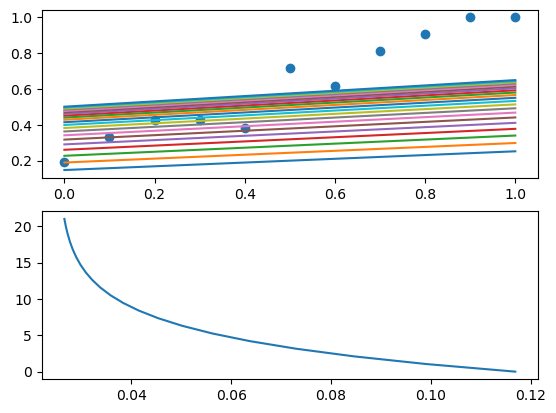

21


In [6]:
cost_function_history = []
number_of_iter = 0
max_iter = 20
fig, axs = plt.subplots(2)
while(not converged and number_of_iter <= max_iter):
    prev_w = w
    prev_b = b
    w,b = gradient_descent(w,b)

    number_of_iter += 1
    axs[0].plot(features, hypothesis(w,b,features))
    cost_function_history.append(cost_function(w,b))

axs[0].scatter(features, labels)
axs[1].plot(cost_function_history, np.linspace(0, len(cost_function_history), len(cost_function_history)))
plt.show()
print(number_of_iter)
    
